In [1]:
#function to test models 
import nest_asyncio
import warnings

nest_asyncio.apply()
warnings.filterwarnings("ignore")


In [2]:
from mb_pytorch.models.modelloader import ModelLoader
from mb_pytorch.dataloader.loader import DataLoader

k = DataLoader('../scripts/model_load/loader_y.yaml')
k_data = k.data_dict['data']
model_data_dict = k.data_dict['model']

In [3]:
k.data_dict

{'data': {'from_datasets': 'Flowers102',
  'from_file': False,
  'work_dir': '/home/malav/mb_pytorch/data/',
  'file': '/home/malav/mb_pytorch/data/csv/file_data.csv',
  'use_img_dir': True,
  'img_dir': '/home/malav/mb_pytorch/data/images1/',
  'thresholding_pd': 100},
 'train_params': {'batch_size': 16,
  'num_workers': 4,
  'pin_memory': True,
  'shuffle': True,
  'seed': 42},
 'test_params': {'batch_size': 16,
  'num_workers': 4,
  'pin_memory': True,
  'shuffle': False,
  'seed': 42},
 'transforms_list': {'transform': True,
  'resize': {'val': True, 'args': {'size': [64, 64]}},
  'random_crop': {'val': False, 'args': {'size': [62, 62]}},
  'random_horizontal_flip': {'val': True, 'args': {'p': 0.5}},
  'random_vertical_flip': {'val': False, 'args': {'p': 0.5}},
  'random_rotation': {'val': False, 'args': {'degrees': 90}},
  'random_grayscale': {'val': False, 'args': {'p': 0.1}},
  'random_color_jitter': {'val': True,
   'args': {'brightness': 0.4,
    'contrast': 0.4,
    'saturati

In [4]:
model_data_load = ModelLoader(k.data_dict['model'])

model_data =  model_data_load.get_model()

train_loader,val_loader,_,_ = k.data_load()

all_data = k.data_dict

Wed 00:24:58,021 INF Model mobilenet_v3_small loaded from torchvision.models.                                                        


Files already downloaded and verified
Files already downloaded and verified


In [5]:
from mb_pytorch.training.train_params import train_helper

model_yaml_data = k.data_dict['model']
loss_attr,optimizer_attr,optimizer_dict,scheduler_attr,scheduler_dict = train_helper(model_yaml_data) 

In [6]:
import torch.nn.functional as F
loss_attr = F.cross_entropy

In [12]:
print(loss_attr)
print(optimizer_attr)
print(optimizer_dict)
print(scheduler_attr)
print(scheduler_dict)

<function cross_entropy at 0x7efe3635fd30>
<class 'torch.optim.adam.Adam'>
{'lr': 0.001, 'betas': [0.9, 0.999], 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}
<class 'torch.optim.lr_scheduler.StepLR'>
{'step_size': 3, 'gamma': 0.2}


In [13]:

from torch.utils.tensorboard import SummaryWriter
import os
import torch
## setting the trianing params

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

optimizer = optimizer_attr(model_data.parameters(),**optimizer_dict)
scheduler = scheduler_attr(optimizer,**scheduler_dict)

best_val_loss = float('inf')

path_logs = os.path.join(all_data['data']['work_dir'], 'logs')
writer = SummaryWriter(log_dir=path_logs)

all_model_data= k.data_dict['model']


In [14]:
from mb_utils.src.logging import logger
from itertools import islice


train_loader10 = islice(train_loader, 10)
val_loader10 = islice(val_loader, 10)


  0%|          | 0/10 [00:00<?, ?it/s]Wed 00:25:59,732 INF Training Started                                                                                                
Wed 00:25:59,941 INF Epoch 1 - Batch 1 - Train Loss: 4.623090744018555                                                               
Wed 00:26:00,034 INF Epoch 1 - Batch 2 - Train Loss: 4.617526531219482                                                               
Wed 00:26:00,364 INF Epoch 1 - Batch 3 - Train Loss: 4.616198539733887                                                               
Wed 00:26:00,446 INF Epoch 1 - Batch 4 - Train Loss: 4.6096510887146                                                                 
Wed 00:26:00,521 INF Epoch 1 - Batch 5 - Train Loss: 4.606926918029785                                                               
Wed 00:26:00,596 INF Epoch 1 - Batch 6 - Train Loss: 4.6133856773376465                                                              
Wed 00:26:00,671 INF Epo

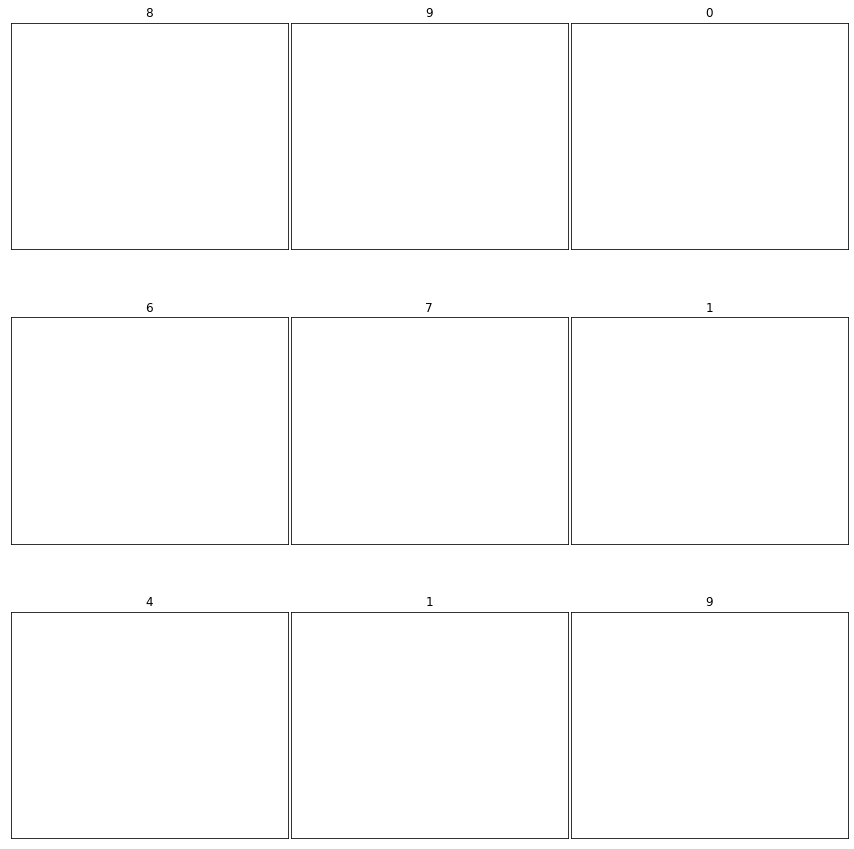

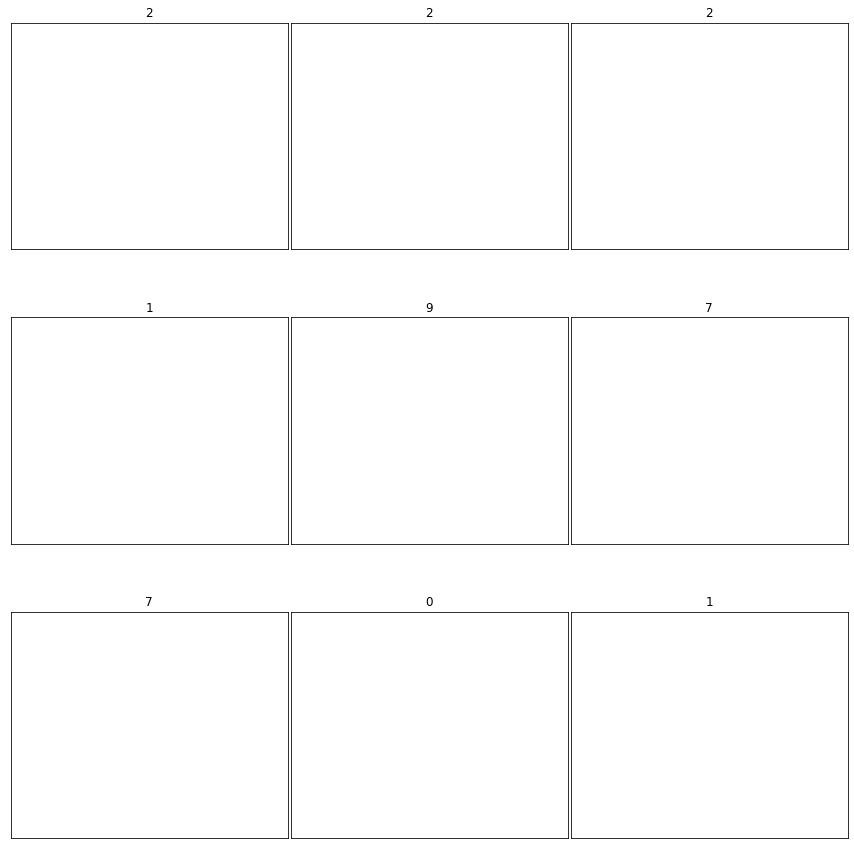

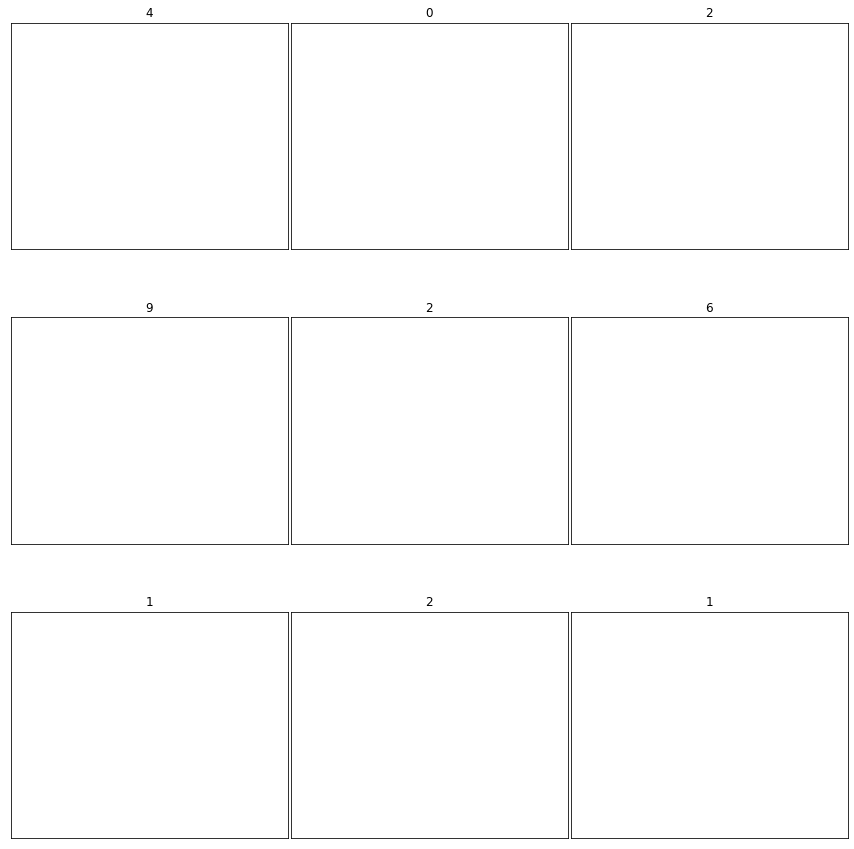

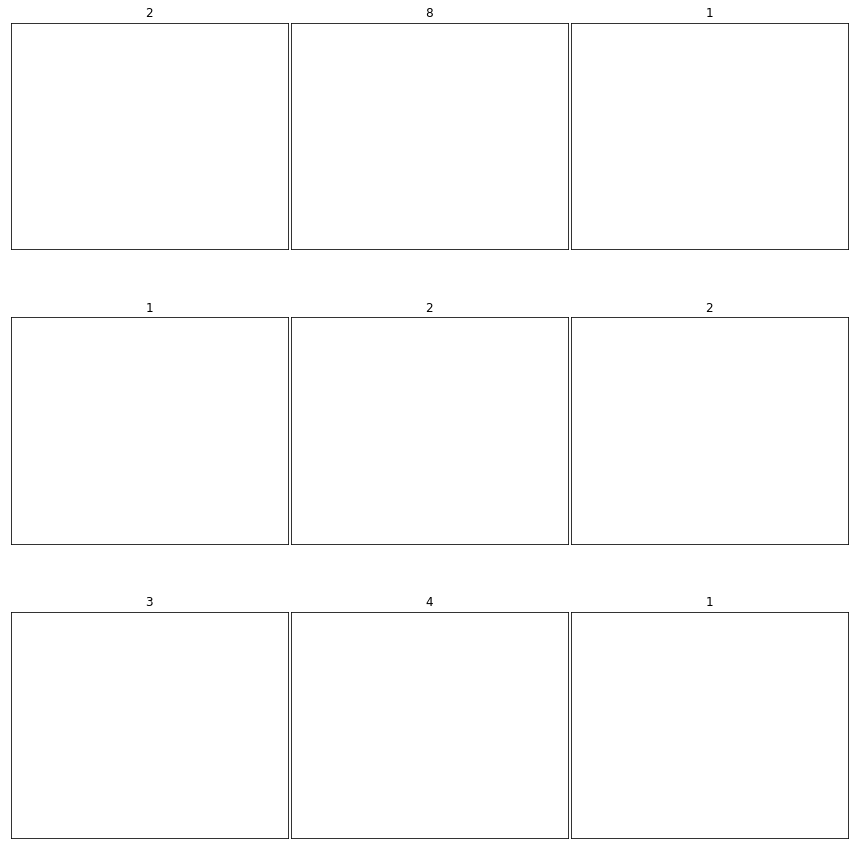

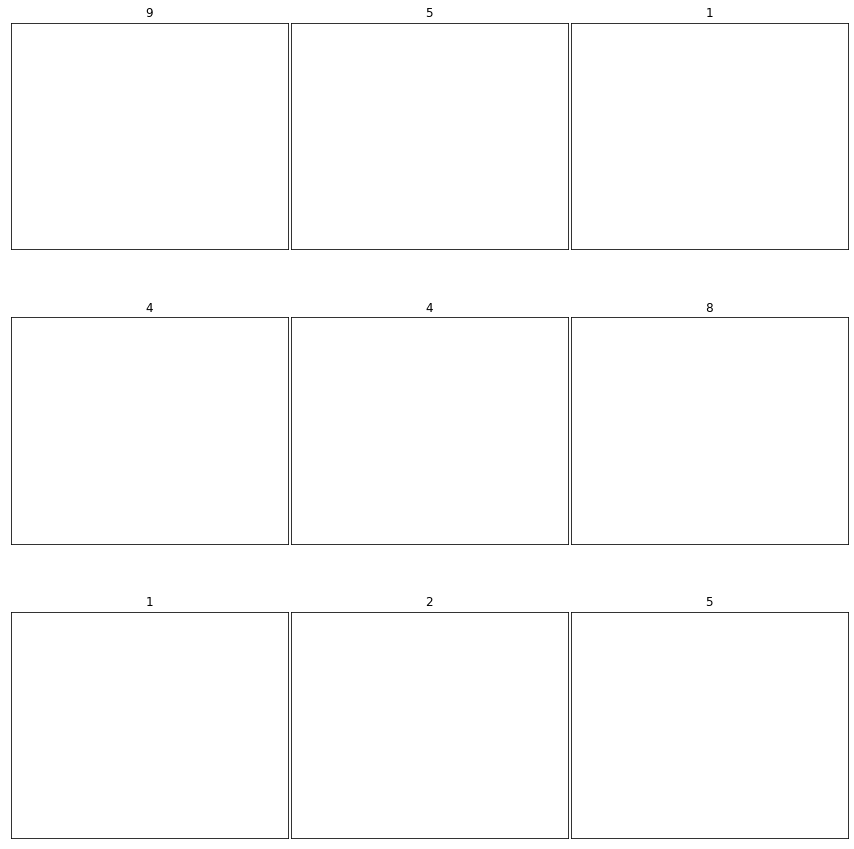

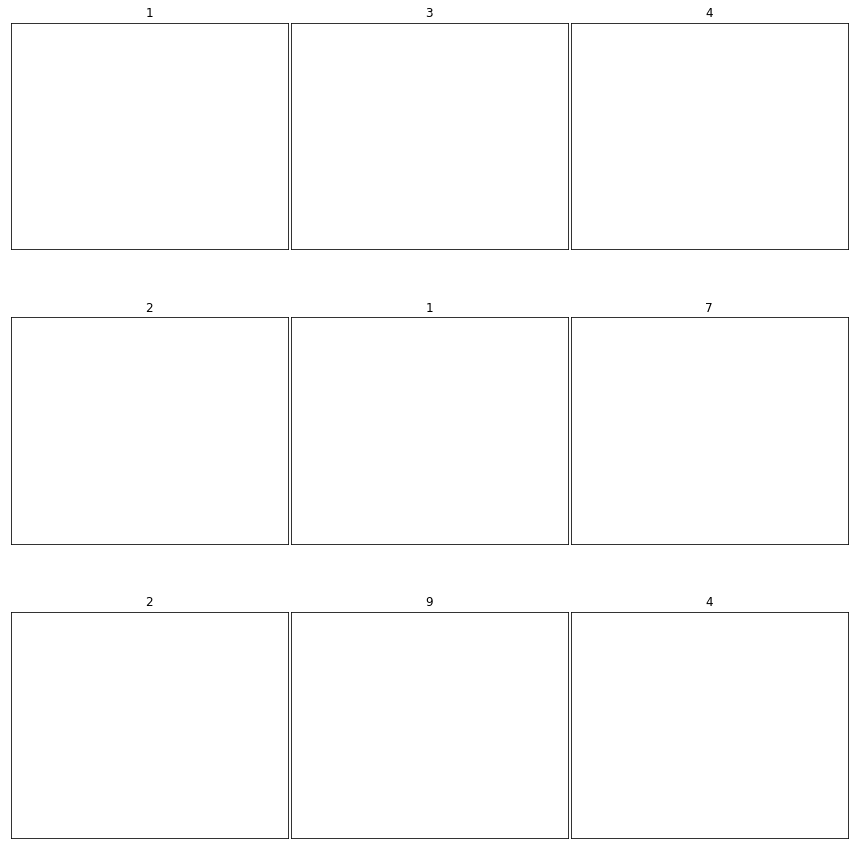

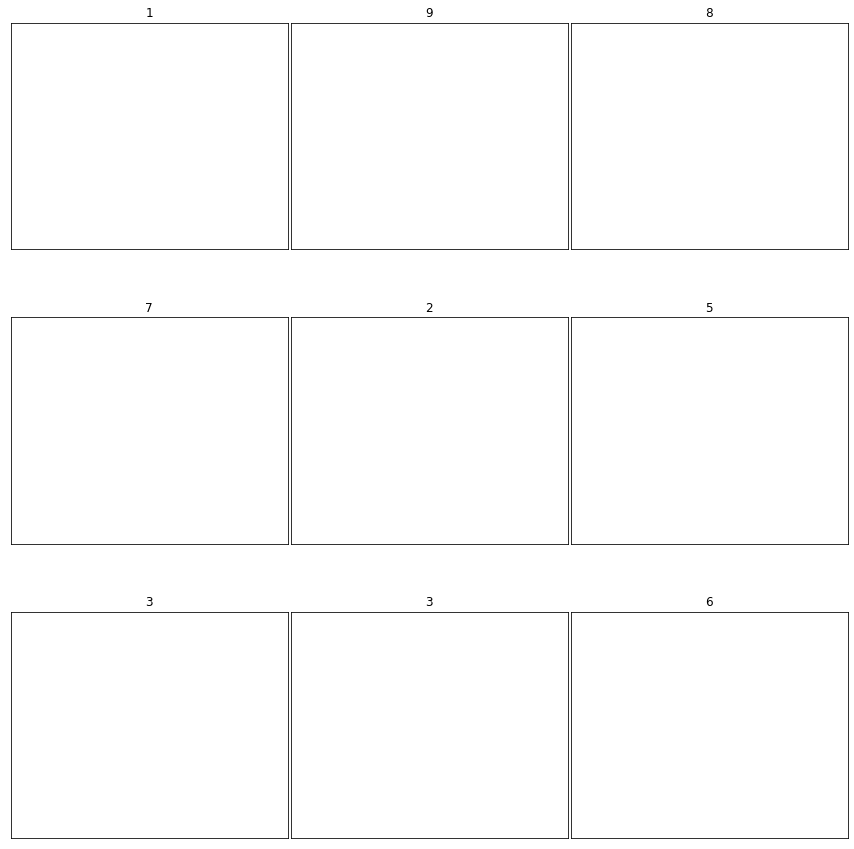

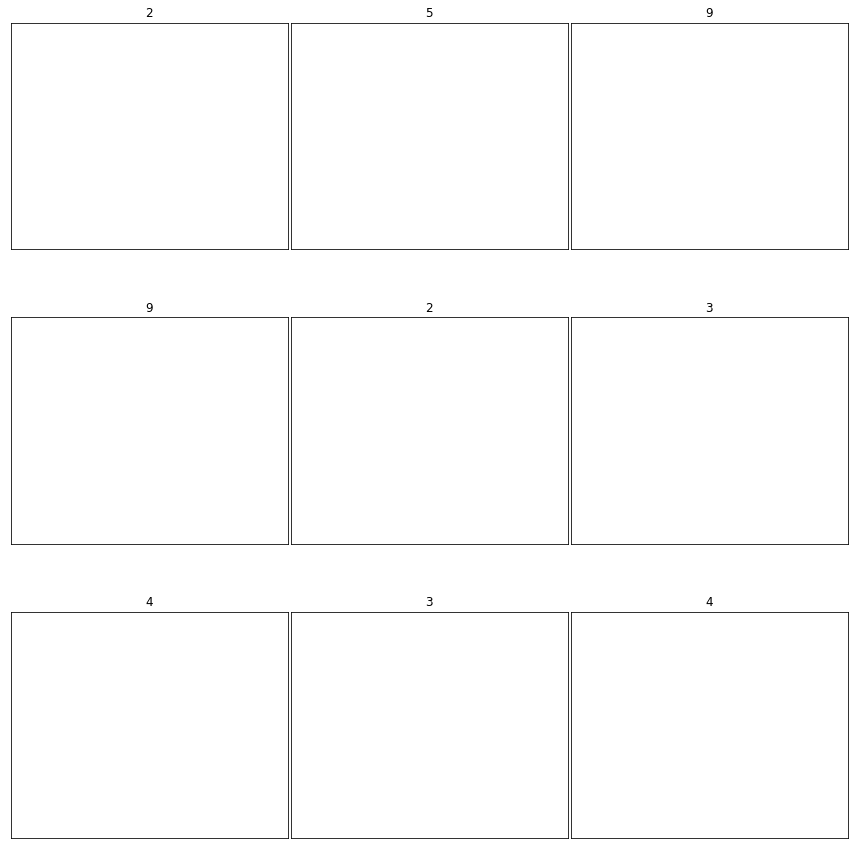

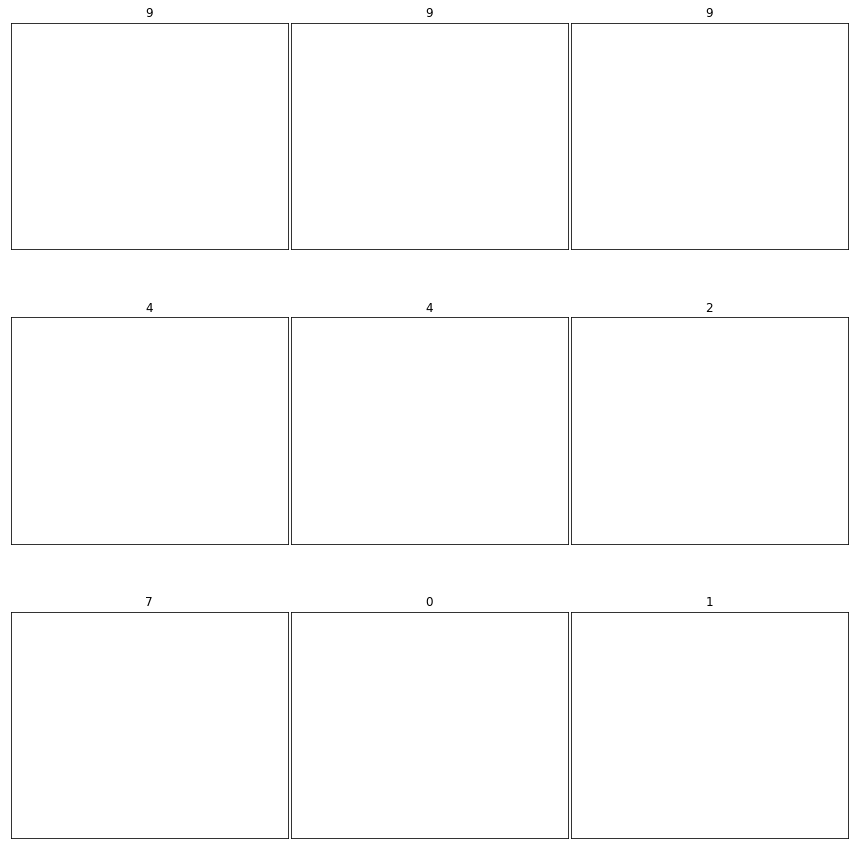

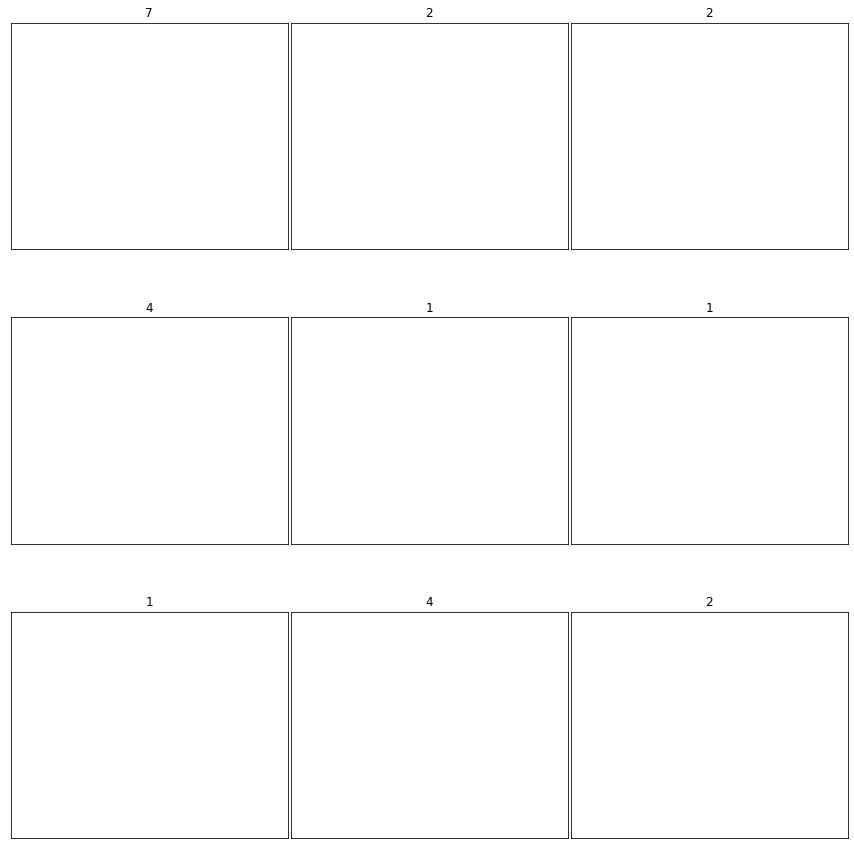

In [15]:
from mb_pytorch.classification.training import classification_train_loop

classification_train_loop(k_data,model_data_dict,model_data,train_loader,val_loader,loss_attr,optimizer,scheduler,writer,logger=logger,gradcam=['model_data.features[-1][0]','model_data.features[0][0]'],device=device)

In [8]:
list(model_data.named_modules())

[('',
  MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2dNormActivation(


In [9]:
print(model_data.avgpool)
print(model_data.classifier.in_features)

AdaptiveAvgPool2d(output_size=1)
576


In [62]:
a =(model_data.avgpool)
print(a)
b = 'model_data.avgpool'
print(b)
print(b.split('.')[1])
c = eval(b)
print(c)


AdaptiveAvgPool2d(output_size=1)
model_data.avgpool
avgpool
AdaptiveAvgPool2d(output_size=1)
AdaptiveAvgPool2d(output_size=1)


In [63]:
import tqdm
from pytorch_grad_cam import GradCAM
from mb_pytorch.utils.viewer import new_show_cam_on_image

model_data.to(device)

for i in tqdm.tqdm(range(20)):
        
        ##train loop
        
        model_data.train()
        train_loss = 0
        
        if logger:
            logger.info('Training Started')
        for j,(x,y) in enumerate(train_loader):
            x,y = x.to(device),y.to(device)
            optimizer.zero_grad()
            y_pred = model_data(x)
            current_loss = loss_attr()(y_pred,y)
            current_loss.backward()            
            optimizer.step()
            if scheduler is not None:
                scheduler.step()    
            train_loss += current_loss.item()
            if logger:
                logger.info(f'Epoch {i+1} - Batch {j+1} - Train Loss: {current_loss.item()}')
            
            #get grad cam images
            gradcam=['model_data.classifier']
            if gradcam and writer is not None:
                x_grad = x[0,:].to('cpu')
                x_grad = x_grad.unsqueeze(0)
                y_grad = y[0].to('cpu')
                for cam_layers in gradcam:
                    str_cam_layers = str(cam_layers)
                    print(str_cam_layers.split('.')[1])
                    grad_cam_layer= eval(cam_layers)
                    print(grad_cam_layer)
                    djkfals
                    
                    if logger:
                        logger.info(f'Gradcam for layer {cam_layers} started')
                    with GradCAM(model=model_data,target_layers=[cam_layers],use_cuda=False) as cm: 
                        try:
                            cr = cm(input_tensor=x_grad)[0,:]  
                        except:
                            cr = None 
                            if logger:
                                logger.info(f'Gradcam for layer {cam_layers} failed')
                        if cr is not None:
                            if logger:
                                logger.info(f'Gradcam for layer {cam_layers} completed')
                            cam_img = new_show_cam_on_image(x_grad[0].numpy(),cr,use_rgb=False)
                            writer.add_image(f'Gradcam/{cam_layers}',cam_img,global_step=i)
        avg_train_loss = train_loss / len(train_loader)
        if logger:
            logger.info(f'Epoch {i+1} - Train Loss: {avg_train_loss}')
    

  0%|          | 0/20 [00:00<?, ?it/s]Tue 13:37:04,193 INF Training Started                                                                                                
Tue 13:37:04,911 INF Epoch 1 - Batch 1 - Train Loss: 2.4315595626831055                                                              


classifier
Linear(in_features=576, out_features=10, bias=True)


  0%|          | 0/20 [00:00<?, ?it/s]


NameError: name 'djkfals' is not defined

In [ ]:
## old process

import tqdm
from torch.utils.tensorboard import SummaryWriter
import os


for i in tqdm.tqdm(range(all_model_data['model_epochs'])):
    ##train loop
    model_data.train()
    train_loss = 0
    for j,(x,y) in enumerate(train_loader10):
        x,y = x.to(device),y.to(device)
        optimizer.zero_grad()
        y_pred = model_data(x)
        current_loss = loss_attr()(y_pred,y)
        current_loss.backward()    
        optimizer.step()
        train_loss += current_loss.item()
        logger.info(f'Epoch {i+1} - Batch {j+1} - Train Loss: {current_loss.item()}')
    
    avg_train_loss = train_loss / len(train_loader)
    logger.info(f'Epoch {i+1} - Train Loss: {avg_train_loss}')
    
    writer.add_scalar('Loss/train', avg_train_loss, global_step=i)
        
    if scheduler is not None:
        scheduler.step()
    
    for name, param in model_data.named_parameters():
        writer.add_histogram(name, param, global_step=i)
        
    #get grad cam images
        
    #validation loop
    val_loss = 0
    val_acc = 0
    num_samples = 0
    
    model_data.eval()
    with torch.no_grad():
        for x_val, y_val in val_loader10:
            x_val, y_val = x_val.to(device), y_val.to(device)
            output = model_data(x_val)
            val_loss += loss_attr()(output, y_val).item() * x_val.size(0)
            _, preds = torch.max(output, 1)
            val_acc += torch.sum(preds == y_val.data)
            num_samples += x_val.size(0)
            logger.info(f'Epoch {i+1} - Batch {j+1} - Val Loss: {val_loss}')
        
        if num_samples == 0:
            num_samples = 1
        val_loss /= num_samples
        val_acc = val_acc / num_samples
        logger.info(f'Epoch {i+1} - Val Loss: {val_loss}', f'Epoch {i+1} - Val Acc: {val_acc}')
    
    writer.add_scalar('Loss/val', val_loss, global_step=i)
    writer.add_scalar('Accuracy/val', val_acc, global_step=i)
    
    # save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model_data.state_dict()

        path = os.path.join(all_data['data']['work_dir'], 'best_model.pth')
        torch.save(best_model, path)
        logger.info(f'Epoch {i+1} - Best Model Saved')
        
    model_data.train()
        


  0%|          | 0/50 [00:00<?, ?it/s]Tue 01:34:05,255 INF Epoch 1 - Batch 1 - Train Loss: 2.7716147899627686                                                              
Tue 01:34:07,058 INF Epoch 1 - Batch 2 - Train Loss: 3.0471785068511963                                                              
Tue 01:34:08,862 INF Epoch 1 - Batch 3 - Train Loss: 3.576723575592041                                                               
Tue 01:34:10,702 INF Epoch 1 - Batch 4 - Train Loss: 3.355401039123535                                                               
Tue 01:34:12,620 INF Epoch 1 - Batch 5 - Train Loss: 3.2821779251098633                                                              
Tue 01:34:14,500 INF Epoch 1 - Batch 6 - Train Loss: 3.361398220062256                                                               
Tue 01:34:16,429 INF Epoch 1 - Batch 7 - Train Loss: 3.22971510887146                                                                
Tue 01:34:18,368 INF Epo

In [ ]:
from mb_pytorch.utils.extra_utils import feature_view

for l in train_loader10:
    x,y = l
    break

from mb_pytorch.utils.extra_utils import get_model_summary
get_model_summary(model_data,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]           4,096
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]          16,384
      BatchNorm2d-12            [-1, 256, 8, 8]             512
           Conv2d-13            [-1, 256, 8, 8]          16,384
      BatchNorm2d-14            [-1, 25

In [107]:
list(model_data.named_modules()).index(('conv1', model_data.conv1))

1

In [114]:
model_data.layer4[-1]

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)

In [126]:
list(model_data.named_modules()).index(('fc', model_data.fc))

150

In [64]:
from mb_pytorch.models.modelloader import ModelLoader
from mb_pytorch.dataloader.loader import DataLoader
from mb_pytorch.training.train_params import train_helper
from torch.utils.tensorboard import SummaryWriter
import os
from mb_utils.src.logging import logger
import torch
from mb_pytorch.classification.training import classification_train_loop

k = DataLoader('/home/malav/jupyter_tests/Malav/classification.yaml')

k_data = k.data_dict['data']
model_data_dict = k.data_dict['model']

model_data_load = ModelLoader(k.data_dict['model'])
model_data =  model_data_load.get_model()
train_loader,val_loader,_,_ = k.data_load()
all_data = k.data_dict

model_yaml_data = k.data_dict['model']
loss_attr,optimizer_attr,optimizer_dict,scheduler_attr,scheduler_dict = train_helper(model_yaml_data)

optimizer =optimizer_attr(model_data.parameters(),**optimizer_dict)
scheduler = scheduler_attr(optimizer,**scheduler_dict)
best_val_loss = float('inf')
path_logs = os.path.join(all_data['data']['work_dir'], 'logs')
writer = SummaryWriter(log_dir=path_logs)
all_model_data= k.data_dict['model']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

classification_train_loop(k_data,model_data_dict,model_data,train_loader,val_loader,loss_attr,optimizer,scheduler,writer,logger=logger,gradcam=['model_data.fc'],device=device)

